In [1]:
!pip install pillow numpy opencv-python-headless opencv-contrib-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 MB 27.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [2]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# Definir la función para mejorar la resolución de la imagen
def enhance_image_resolution(image: Image.Image) -> Image.Image:
    """
    Mejora la resolución de la imagen utilizando el modelo EDSR de OpenCV.
    """
    # Convertir la imagen a un array de numpy
    image_np = np.array(image)

    # Crear el objeto de superresolución
    super_res_model = cv2.dnn_superres.DnnSuperResImpl_create()

    # Leer el modelo preentrenado
    super_res_model.readModel('EDSR_x4.pb')  # Ruta al modelo preentrenado de EDSR

    # Establecer el modelo para la escala x4
    super_res_model.setModel("edsr", 4)

    # Aplicar el modelo para mejorar la resolución
    enhanced_image_np = super_res_model.upsample(image_np)

    # Convertir el array de numpy de vuelta a una imagen PIL
    enhanced_image = Image.fromarray(enhanced_image_np)

    return enhanced_image

In [5]:
# Cargar una imagen de ejemplo
image_path = "low_res_cityscape.webp"  # Ruta a la imagen descargada
image = Image.open(image_path)



(-0.5, 1023.5, 1023.5, -0.5)

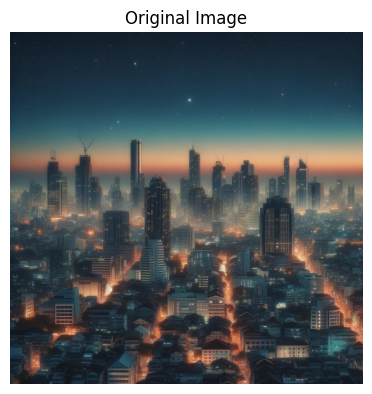

In [6]:
# Mostrar la imagen original
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')


In [8]:
enhanced_image = enhance_image_resolution(image)

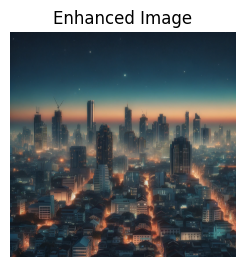

In [9]:
# Mostrar la imagen mejorada
plt.subplot(1, 2, 2)
plt.title("Enhanced Image")
plt.imshow(enhanced_image)
plt.axis('off')

plt.show()

In [10]:
# Verificar las dimensiones de las imágenes
print("Original Image Size:", image.size)
print("Enhanced Image Size:", enhanced_image.size)


Original Image Size: (1024, 1024)
Enhanced Image Size: (4096, 4096)
